### Emittance growth for bunch splitted in longitudinal slices, as a function of the center of the bunch.


- **Plot the emittance and emittance growth for each one of the longitudinal slices of the bunch as a function of the initial z position of the center of each slice.**
- The simulation needs to be performed with frozen longitudinal motion. 
- The file.pkl needs to contain the emittance values for each slice at each turn. 

In [1]:
import sys
sys.path.append('../../utils/')

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from PyHEADTAIL.particles.slicing import UniformBinSlicer

PyHEADTAIL v1.13.5




In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

In [3]:
# https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-numpy-sci
def moving_average(x, window):
    return np.convolve(x, np.ones(window), 'valid') / window

In [4]:
# Get the initial z for each slice
def get_z_centers(n_slices, sigma_z):
    # Use the same slicer as you used in the simulation script
    slicer_for_wakefields = UniformBinSlicer(n_slices, z_cuts=(-3.*sigma_z, 3.*sigma_z))
    my_sliceSet = bunch.get_slices(slicer_for_wakefields) # type; PyHEADTAIL.particles.slicing.SliceSet
    z_centers = my_sliceSet.z_centers
    return z_centers

In [5]:
def removeSlices_and_MovingAverage(n_remove_slices, n_turns, decTurns, emitY_perSlice):
    emitY_perSlice_dict = {}

    z_centers = get_z_centers(n_slices, sigma_z)
    new_z_centers = z_centers[n_remove_slices:-n_remove_slices][:-19] # moving average window -1
    
    for index, selected_slice in enumerate(new_z_centers):
        emitY_perSlice_dict[f'slice {index}'] = []
    
    for selected_turn in range(int(n_turns/decTurns)):   
    
        new_emitY = emitY_perSlice[selected_turn][n_remove_slices:-n_remove_slices] # slices with removed head and tail
        emitY_moving_average = moving_average(new_emitY, window=20)
    
        for index, selected_slice in enumerate(new_z_centers):   
            emitY_perSlice_dict[f'slice {index}'].append(emitY_moving_average[index])
    return new_z_centers, emitY_perSlice_dict

In [6]:
path_to_studies = './'

In [7]:
# study parameters
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
n_slices = 500                # number of longitudinal slices
sigma_z = 0.155               # rms bunch length [m]
n_remove_slices = 150         # the number of slices to be removed from the head and the tail of the bunch (see job004a and job004b)

### Load emittances and initial bunch distribution

In [8]:
emitY_perSlice = pickle.load(open(path_to_studies+'file.pkl', 'rb'))

In [9]:
#Load the bunch, you need to activate a Pyheadtail version v1.13 or newer
bunch = pickle.load(open(path_to_studies+'bunch', 'rb')) # you need to activate an environment with pyhedtail version at least v1.13.path_to_studies

In [10]:
new_z_centers, emitY_perSlice_dict = removeSlices_and_MovingAverage(n_remove_slices, n_turns, decTurns, emitY_perSlice)

In [11]:
emitY_perSlice_dict.keys()

dict_keys(['slice 0', 'slice 1', 'slice 2', 'slice 3', 'slice 4', 'slice 5', 'slice 6', 'slice 7', 'slice 8', 'slice 9', 'slice 10', 'slice 11', 'slice 12', 'slice 13', 'slice 14', 'slice 15', 'slice 16', 'slice 17', 'slice 18', 'slice 19', 'slice 20', 'slice 21', 'slice 22', 'slice 23', 'slice 24', 'slice 25', 'slice 26', 'slice 27', 'slice 28', 'slice 29', 'slice 30', 'slice 31', 'slice 32', 'slice 33', 'slice 34', 'slice 35', 'slice 36', 'slice 37', 'slice 38', 'slice 39', 'slice 40', 'slice 41', 'slice 42', 'slice 43', 'slice 44', 'slice 45', 'slice 46', 'slice 47', 'slice 48', 'slice 49', 'slice 50', 'slice 51', 'slice 52', 'slice 53', 'slice 54', 'slice 55', 'slice 56', 'slice 57', 'slice 58', 'slice 59', 'slice 60', 'slice 61', 'slice 62', 'slice 63', 'slice 64', 'slice 65', 'slice 66', 'slice 67', 'slice 68', 'slice 69', 'slice 70', 'slice 71', 'slice 72', 'slice 73', 'slice 74', 'slice 75', 'slice 76', 'slice 77', 'slice 78', 'slice 79', 'slice 80', 'slice 81', 'slice 82', 'sl

# Plotting

### A) Plot emittance per slice for the initial distribution

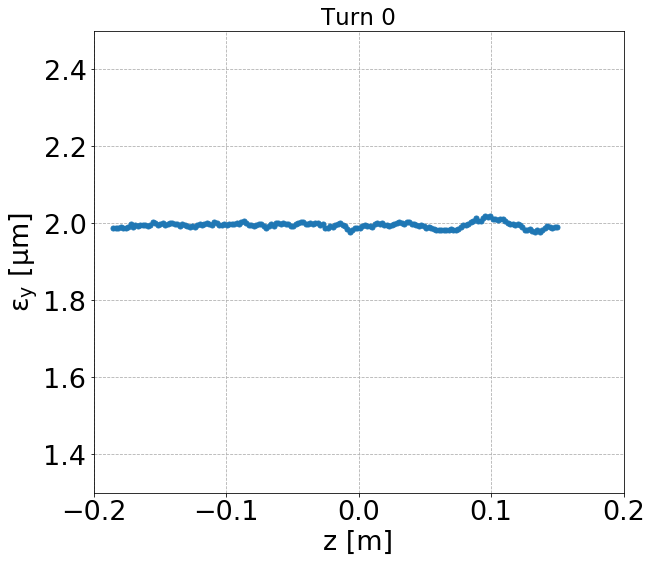

In [13]:
turn = 0
for my_slice in range(len(emitY_perSlice_dict.keys())):
    plt.plot(new_z_centers[my_slice], np.array(emitY_perSlice_dict[f'slice {my_slice}'][turn])*1e6, 'o', c='C0')

plt.xlabel('z [m]')
plt.ylabel(r'$\mathrm{\epsilon_y \ [\mu m]}$')
plt.grid(linestyle='dashed')
plt.title(f'Turn {turn}')
plt.ylim(1.3, 2.5)
plt.xlim(-0.2, 0.2)


savefig = False
if savefig:
    plt.savefig('eyVSzInit_initialDistribution_MovingAverageWakes_VsNoWakes.png', bbox_inches='tight')

### B) Plot emittance per slice for several turns

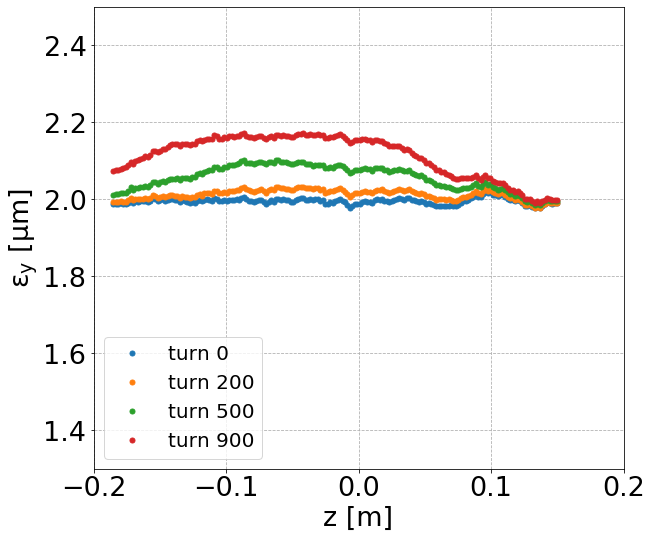

In [14]:
selected_turns = [0, 200, 500, 900]

for index, turn in enumerate(selected_turns):
    for my_slice in range(len(emitY_perSlice_dict.keys())):
        if my_slice ==0:
            plt.plot(new_z_centers[my_slice], np.array(emitY_perSlice_dict[f'slice {my_slice}'][turn])*1e6, 'o', c=f'C{index}', label=f'turn {turn}')
        else:
            plt.plot(new_z_centers[my_slice], np.array(emitY_perSlice_dict[f'slice {my_slice}'][turn])*1e6, 'o', c=f'C{index}')
    
plt.xlabel('z [m]')
plt.ylabel(r'$\mathrm{\epsilon_y \ [\mu m]}$')
plt.grid(linestyle='dashed')
plt.ylim(1.3, 2.5)
plt.xlim(-0.2, 0.2)
plt.legend(loc=3)



savefig = False
if savefig:
    plt.savefig('eyVSzInit_MovingAverage_SelectedTurns.png', bbox_inches='tight')

### C) Plot emittance growth for selected z values

In [72]:
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulation

[  0.   18.1  36.2  54.3  72.4  90.5 108.6 126.7 144.8 162.9 181. ]


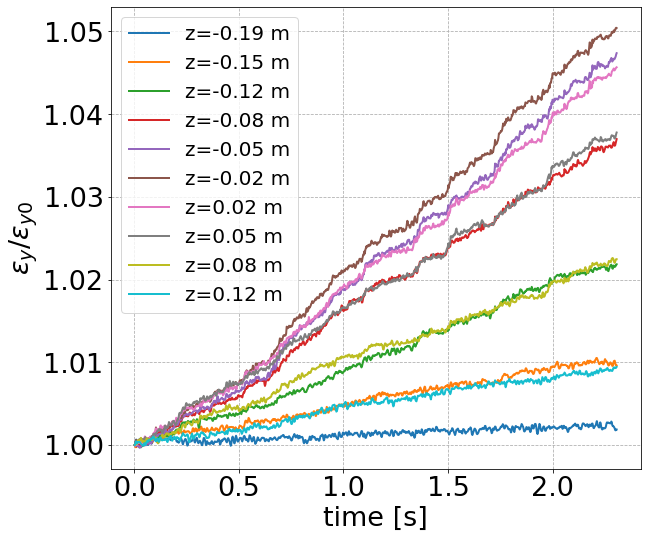

In [73]:
selected_index = np.linspace(0, len(emitY_perSlice_dict.keys()), 11)
print(selected_index)
for i in selected_index[:-1]:
    i = int(i)
    plt.plot(tspan, emitY_perSlice_dict[f'slice {i}']/ emitY_perSlice_dict[f'slice {i}'][0], label=f'z={new_z_centers[i]:.2f} m')
plt.ylabel(r'$\epsilon_y / \epsilon_{y0}$')
plt.xlabel('time [s]')
plt.grid(linestyle='dashed')
plt.legend()


savefig = False
if savefig:
    plt.savefig('eyvsTime_PostProcessed_SelectedSlices.png', bbox_inches='tight')

### D) Compute growth rate for each slice
- After removing the first and last 150 slices and performin a moving average, window 20, for the slices of the center of the bunch.

In [74]:
dey_perSlice = [] # slope of the linear fit
dey_err_perSlice = [] # the error of the slope of the fit


for my_slice in range(len(new_z_centers)):
    # linear fit
    [m_y, b_y], cov_y = np.polyfit(tspan, emitY_perSlice_dict[f'slice {my_slice}'], 1, cov=True)
    err_y = np.sqrt(np.diag(cov_y))
    dey_perSlice.append(m_y)
    dey_err_perSlice.append(err_y[0])

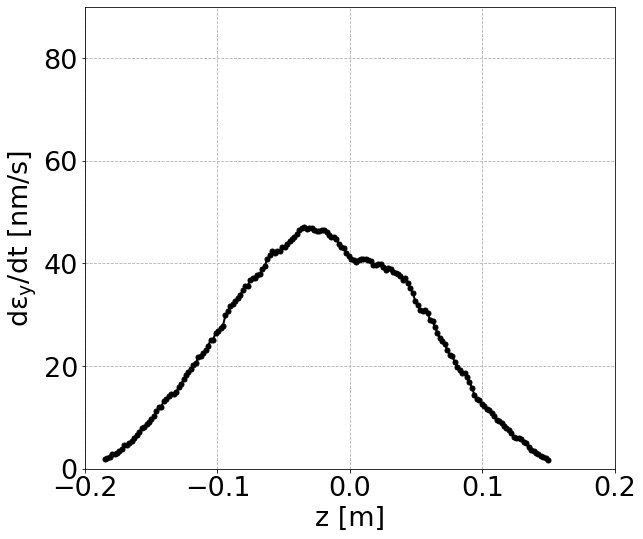

In [75]:
plt.errorbar(new_z_centers, np.array(dey_perSlice)*1e9, yerr=np.array(dey_err_perSlice)*1e9 , marker='o', c='k')
plt.ylabel(r'$\mathrm{d\epsilon_y / dt \ [nm/s]}$')
plt.xlabel('z [m]')
plt.grid(linestyle='dashed')

plt.ylim(0, 90)
plt.xlim(-0.2, 0.2)


savefig = False
if savefig:
    plt.savefig('deyvsSlice_postProcessed.png', bbox_inches='tight')